# ***Dimensionality Reduction*** #

- ## **Curse of Dimensionality** ##
The curse of dimensionality refers to the problems that arise when analyzing and organizing data in high-dimensional spaces. As the number of dimensions (features) increases, the volume of the space increases exponentially, making data points sparse and analysis more difficult. This sparsity complicates tasks such as clustering, classification, and regression because the distance between data points becomes less meaningful, leading to poor model performance and overfitting.

- ## **Projection** ##
Projection is a technique used to reduce the number of dimensions in a dataset by transforming the data into a lower-dimensional space. This is typically achieved using linear methods like Principal Component Analysis (PCA), which identifies the directions (principal components) that capture the most variance in the data. By projecting the data onto these principal components, we simplify the data while retaining as much important information as possible, making it easier to visualize and analyze.

- ## **Manifold Learning** ##
Manifold learning is a non-linear dimensionality reduction technique that aims to uncover the low-dimensional structure of high-dimensional data. It assumes that high-dimensional data lies on a lower-dimensional manifold embedded within the higher-dimensional space. Techniques like t-SNE and UMAP preserve the local and global geometric relationships within the data, allowing us to visualize and understand the intrinsic structure of complex datasets by reducing them to fewer dimensions while retaining essential patterns and relationships.

## **PCA (Principal component Analysis)** ##

- PCA finds the hyperplane (plane with dimension one less that on high dimensional space) closes to data and preservers maximum variance. It will most likely retain most information.
- There is standard matrix factorization technique known as Singular Value Decomposition (SVD) that decomposes training set into 3 which out of which one contains the unit vectors that define all principle components

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA


# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(int)

# Print the shapes to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of X: (70000, 784)
Shape of y: (70000,)


In [45]:
X_centered=X-X.mean(axis=0)
princ_comp_analysis=PCA(n_components=0.95)
X2D=princ_comp_analysis.fit_transform(X)
c1=princ_comp_analysis.components_.T[:,0].reshape(28,28)
c2=princ_comp_analysis.components_.T[:,1].reshape(28,28)

In [50]:
X2D.shape

(70000, 154)

In [46]:
fpc=princ_comp_analysis.components_.T[:,0]

In [47]:
princ_comp_analysis.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

- **We can compress the 784 features into over 150 featuers are you can see the shape of the compressed data, and then we can make the original dataset from this using inverse transform but it would not be 100% identical due to loss of information**

In [53]:
pca=PCA(n_components=154)
x_compressed=pca.fit_transform(X)
x_decompressed=pca.inverse_transform(x_compressed)
print (f"The shape of compressed dataset is {x_compressed.shape} !")
print (f"The shape of un-compressed dataset is {x_decompressed.shape} !")

The shape of compressed dataset is (70000, 154) !
The shape of un-compressed dataset is (70000, 784) !


In [48]:
c1

array([[ 4.79861877e-20,  0.00000000e+00,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.46944695e-18,  0.00000000e+00,
         0.00000000e+00, -5.42101086e-20, -1.35525272e-20,
        -9.45584907e-07, -3.72373918e-06, -1.83973346e-06,
        -7.66555609e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.16824828e-07,  4.29492620e-07,
         4.87706215e-06,  1.65229866e-05,  2.20363253e-05,
         3.88808469e-05,  7.40607809e-05,  8.83248604e-05,
         8.08496291e-05,  8.95693486e-05,  1.06176520e-04,
         7.93597126e-05,  3.60812098e-05,  3.08090474e-05,
         2.39076582e-05,  3.64534622e-06, -2.94191043e-06,
         1.88455271e-06,  1.14

- **Each number in the vector indicated how much each feature contribute into variance.(Principal component is in the direction where data is most spread i.e. have most variance)**

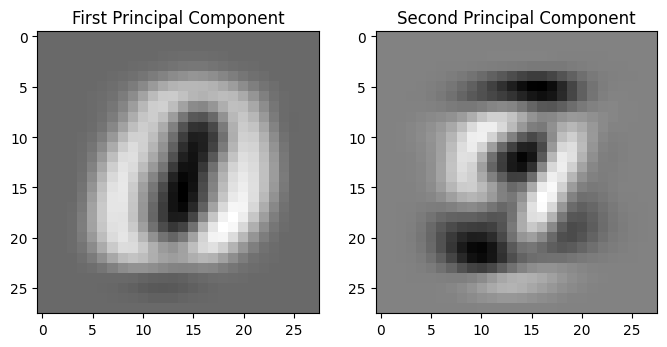

In [49]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(c1, cmap='gray')
plt.title("First Principal Component")

# Plot the second principal component
plt.subplot(1, 2, 2)
plt.imshow(c2, cmap='gray')
plt.title("Second Principal Component")

plt.show()


## **Randomized PCA** ##

- *If you set the svd_solver hyperparameter to randomized , you are basically using stochastic algorithm known as Randmized PCA which finds the approximation of first d principal components.*
- *It is particularly useful when the d in much smaller than n typically less than 80% of m*

## **Incrimental PCA** ##
- *The basic problem with the previous algorithm is that it requires whole dataset to be stored in memeory before finding the principal components.*
- *IPCA allows you to divide your training set into mini batches and feed them batch by batch (Use partial fit method at each minibatch rather than fit).*

In [55]:
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
n_decomp=100
inc_pca=IncrementalPCA(n_components=154)
for X_batch in (np.array_split(X_train,n_decomp)):
    inc_pca.partial_fit(X_batch)

X_reduced=inc_pca.transform(X_train)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## **Kernel PCA** ##
- *Just like we used the kernel trick in SVM (Which leverages the kernel function to take dot product in higher-dimensional feature space without necessirily transforming the data, computes dot product of transformed vectors from original vector themselves.)*

In [59]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(kernel='rbf',gamma=0.4,n_components=2)
kpca.fit_transform(X)

MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64

## Selecting kernel and tuning hyperparameters ##

- **As kPCA is a unsupervised algorithm so there is no direct performance measure to check the best hyperparameter . Rather this dimensionality reduction is preperation step for supervised classification or regression task**

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

X_subset, _, y_subset, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=42)


clf_pip=Pipeline([
    ("reduce_dim", TruncatedSVD(n_components=50)),
    ("kpca" , KernelPCA(n_components=2)),
    ('log_clf',LogisticRegression())
])

param_grid=[{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":['rbf','sigmoid']
}]

gs=GridSearchCV(clf_pip,param_grid,cv=3)
gs.fit(X_subset,y_subset)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('reduce_dim',
                                        TruncatedSVD(n_components=50)),
                                       ('kpca', KernelPCA(n_components=2)),
                                       ('log_clf', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [67]:
gs.best_params_

{'kpca__gamma': 0.03666666666666667, 'kpca__kernel': 'sigmoid'}

## **LLE (Locally Linear Embedding)** ##

- **It is another very important non linear transformation algorithm . It's a manifold learning technique which does not rely on projections. It works by first measuring how much each training instance related to its neighbors and then look for a low dimensional representation of the dataset while preserving these local relationships as much as possible**

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
le=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
reduced_le=le.fit_transform(X)